Kod z zajęć:

In [42]:
import numpy as np

def print_matrix(vertices, matrix):
  """
  Wypisuje na ekranie graf podany jako macierz sąsiedztwa
  """
  n = len(matrix)
  if (vertices is not None) and (len(vertices) == n):
    vv = vertices
  else:
    vv = range(1, n+1)
  for i in range(n):
    print(vv[i], ":", end="")
    for j in range(n):
      if matrix[i, j]:
        print(" ", vv[j], end="")
    print("")

def print_graph(graph):
  """
  Wypisuje na ekranie graf podany jako lista sąsiedztwa (słownik pythona)
  """
  for v in graph:
    print(v, ":", end="")
    for u in graph[v]:
      print(" ", u, end="")
    print("")

def add_vertex(graph, vertex):
  """
  Nowy wierzchołek do istniejącego grafu
  """
  if vertex not in graph:
    graph[vertex] = []


def add_arc(graph, arc):
  """
  Nowy łuk (podany jako para wierzchołków) do istniejącego grafu.
  Rozważamy grafy proste, skierowane
  """
  u, v = arc
  add_vertex(graph, u)
  add_vertex(graph, v)
  if v not in graph[u]:
    graph[u].append(v)


def add_edge(graph, edge):
  """
  Nowa krawędź (podana jako para wierzchołków) do istniejącego grafu.
  Rozważamy grafy proste, nieskierowane, (bez pętli)
  """
  u, v = edge
  add_vertex(graph, u)
  add_vertex(graph, v)
  if u == v:
    raise ValueError("Pętla!")
  if v not in graph[u]:
    graph[u].append(v)
  if u not in graph[v]:
    graph[v].append(u)


1. Stworzyć funkcję random_graph(n, p), która jako wynik będzie zwracać graf losowy w modelu $G(n, p)$ — $n$ wierzchołków, wystąpienie każdej krawędzi niezależne i z prawdopodobieństwem $p$.

In [43]:
def random_graph(n, p):
    random_graph = {}
    for i in range(1, n+1):
        add_vertex(random_graph, i)
        for j in range(1, i):
            if np.random.random() < p:
                add_edge(random_graph, [i, j])
    return random_graph

In [44]:
test =random_graph(10, 0.5)
print_graph(test)

1 :  3  6
2 :  3  5  10
3 :  1  2  6  7  9  10
4 :  5  7  8  9  10
5 :  2  4  6  7  9  10
6 :  1  3  5  7
7 :  3  4  5  6  9  10
8 :  4  9  10
9 :  3  4  5  7  8
10 :  2  3  4  5  7  8


2. Napisać funkcję graph_to_matrix(graph), która przekształci graf w formie listy sąsiedztwa na macierz sąsiedztwa i wraz z listą wierzchołków zwróci ją jako wynik .

In [45]:
def graph_to_matrix(graph):
    vertices = list(graph.keys())
    n = len(graph)
    matrix = np.zeros((n, n))
    for i in range(n):
        vertex = graph[vertices[i]]
        
        for u in vertex:
            v = vertices.index(u)
            matrix[i, v] +=1
    return vertices, matrix

In [46]:
print_matrix(*graph_to_matrix(test))

1 :  3  6
2 :  3  5  10
3 :  1  2  6  7  9  10
4 :  5  7  8  9  10
5 :  2  4  6  7  9  10
6 :  1  3  5  7
7 :  3  4  5  6  9  10
8 :  4  9  10
9 :  3  4  5  7  8
10 :  2  3  4  5  7  8


3. Napisać funkcję matrix_to_graph(vertices, matrix) która dokona konwersji w drugą stronę — przekształci macierz (i listę nazw wierzchołków) na postać grafu w formie listy sąsiedztwa (słownika).

In [47]:
def matrix_to_graph(vertices, matrix):
        n = len(matrix)
        graph = {}
        for i, name in zip(range(n), vertices):
            graph[name] = []
            for j, name2 in zip(range(n), vertices):
                for _ in  range(int(matrix[i, j])):
                    graph[name].append(name2)
        return graph

In [48]:
print_graph(matrix_to_graph(*graph_to_matrix(test)))

1 :  3  6
2 :  3  5  10
3 :  1  2  6  7  9  10
4 :  5  7  8  9  10
5 :  2  4  6  7  9  10
6 :  1  3  5  7
7 :  3  4  5  6  9  10
8 :  4  9  10
9 :  3  4  5  7  8
10 :  2  3  4  5  7  8


4. Napisać funkcję cycle(n), która stworzy cykl o $n$ wierzchołkach.

In [49]:
# Teoretycznie mieliśmy rozważać grafy nieskierowane bez pętli, ale zorientowałem się o tym już po napisaniu też takiej funkcji.
def cycle_not_directed(n):
    B = np.identity(n)
    temp = B[:,0]
    C = np.c_[B, temp]
    C = C[:,1:].T + C[:,1:]
    
    return np.arange(1,n+1), C

def cycle(n):
    B = np.identity(n)
    temp = B[:,0]
    C = np.c_[B, temp]
    C = C[:,1:].T
    
    return np.arange(1,n+1), C

In [50]:
print("Nieskierowany:")
print_matrix(*cycle_not_directed(5))
print("Skierowany (poprawny):")
print_matrix(*cycle(5))

Nieskierowany:
1 :  2  5
2 :  1  3
3 :  2  4
4 :  3  5
5 :  1  4
Skierowany (poprawny):
1 :  2
2 :  3
3 :  4
4 :  5
5 :  1


Podejście klasowe do grafów (klasowo-funkcyjne, bo randomizowane grafy są tworzone za pomocą zewnętrznych funkcji):

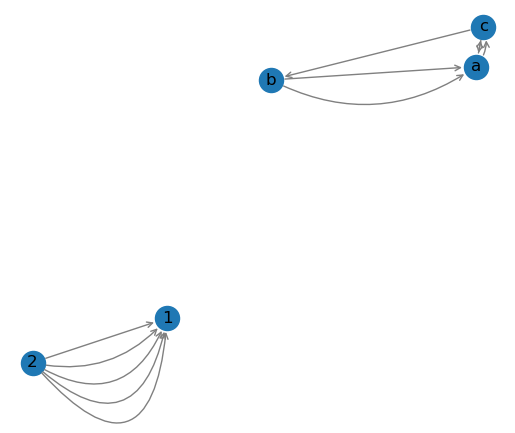

[('a', 'b', {'w': 'ab'}), ('a', 'b', {'w': 'ab'}), ('a', 'c', {'w': 'ac'}), ('b', 'c', {'w': 'bc'}), ('c', 'a', {'w': 'ca'}), ('c', 'a', {'w': 'ca'})]


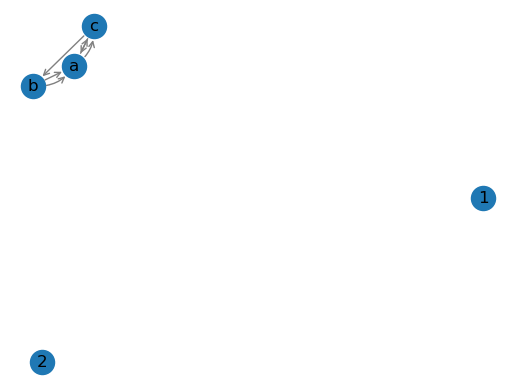

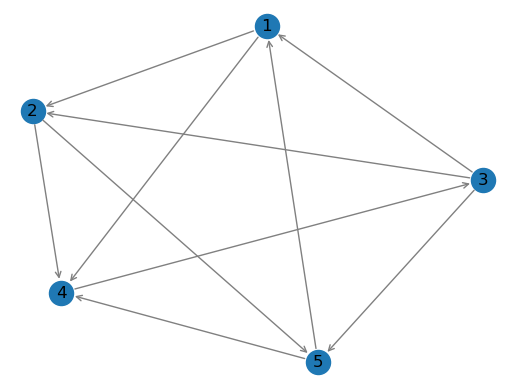

In [52]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

class Graph(ABC):
    """Abstract base class for graphs supporting dictionary and matrix initialization."""
    
    def __init__(self, data=None, vertices=None):
        """
        Initializes the graph.
        :param data: Can be either:
            - A dictionary representing an adjacency list.
            - A 2D matrix representing an adjacency matrix (must be accompanied by `vertices`).
        :param vertices: List of vertex names, required if `data` is a matrix.
        """
        self.adj_list = {}

        if isinstance(data, dict):  # Adjacency list case
            self._init_from_dict(data)
        elif isinstance(data, list):  # Adjacency matrix case
            if vertices is None:
                vertices = np.arange(1, len(data) + 1)
            self._init_from_matrix(data, vertices)
        
        elif data is None:  # Empty graph
            self.adj_list = {}
            self.matrix = np.array([[]])
            self.vertices = []
            self.edges = []
            self.n = 0
        else:
            raise ValueError("Invalid initialization. Provide an adjacency list or a matrix with vertex names.")

    def _init_from_dict(self, adj_dict):
        """Initializes the graph from an adjacency list dictionary."""
        self.n = len(adj_dict)
        for node, neighbors in adj_dict.items():
            self.adj_list[node] = list(neighbors)  # Store as a list to allow multiple edges
        self.matrix, self.vertices = Graph._adjlist_to_matrix(self.adj_list)

    def _init_from_matrix(self, matrix, vertices):
        """Initializes the graph from an adjacency matrix."""
        if len(matrix) != len(vertices):
            raise ValueError("Matrix size must match the number of vertices.")
        self.n = len(vertices)
        self.matrix = np.array(matrix)
        self.vertices = list(vertices)
        self.adj_list = Graph._matrix_to_adjlist(self.matrix, self.vertices)

    @abstractmethod
    def _edges(self):
        pass
    
    @abstractmethod
    def _add_connection(self, u, v):
        pass

    @abstractmethod
    def _remove_connection(self, u, v):
        pass

    @abstractmethod
    def plot_graph(self):
        pass
    
    @staticmethod
    def _adjlist_to_matrix(adj_list):
        """Converts an adjacency list to an adjacency matrix."""
        vertices = list(adj_list.keys())
        n = len(vertices)
        matrix = np.zeros((n, n), dtype=int)
        
        for i, vertex in enumerate(vertices):
            for u in adj_list[vertex]:
                v = vertices.index(u)
                matrix[i, v] += 1  # Increment for multiple edges
        
        return matrix, vertices

    @staticmethod
    def _matrix_to_adjlist(matrix, vertices):
        """Converts an adjacency matrix to an adjacency list."""
        n = len(matrix)
        adj_dict = {vertex: [] for vertex in vertices}

        for i, vertex in enumerate(vertices):
            for j, vertex2 in enumerate(vertices):
                adj_dict[vertex].extend([vertex2] * matrix[i, j])  # Add multiple edges
        
        return adj_dict

    def add_node(self, node):
        """Adds a node to the graph."""
        if node not in self.adj_list:
            self.adj_list[node] = []
            self.vertices.append(node)
            
            # Expand matrix size
            self.n += 1
            new_matrix = np.zeros((self.n, self.n), dtype=int)
            new_matrix[:-1, :-1] = self.matrix  # Copy old matrix
            self.matrix = new_matrix
            

    def remove_node(self, node):
        """Removes a node and its edges."""
        if node in self.adj_list:
            del self.adj_list[node]
            
            for key in self.adj_list.keys():
                self.adj_list[key] = [x for x in self.adj_list[key] if x != node]  # Remove references

            index = self.vertices.index(node)
            self.vertices.remove(node)
            
            # Remove corresponding row and column in matrix
            self.matrix = np.delete(self.matrix, index, axis=0)
            self.matrix = np.delete(self.matrix, index, axis=1)
            # Decreasing the number of vertices
            self.n -= 1

    def neighbors(self, node):
        """Returns neighbors of a node (including multiple edges)."""
        return self.adj_list.get(node, [])

    def __str__(self):
        txt = f"{self.__class__.__name__}" + "\n"
        for key in self.adj_list.keys():
            txt += str(key) + ": "
            for vertex in self.adj_list[key]:
                txt += str(vertex) + " "
            txt += "\n"
        return f"{txt}"

    def __repr__(self):
        return f"{self.__class__.__name__}({dict(self.adj_list)})"


class SimpleGraph(Graph):
    """Undirected graph implementation."""

    def __init__(self, data=None, vertices=None):
        super().__init__(data, vertices)
        self.edges = self._edges()

    def _add_connection(self, u, v):
        """Adds an undirected edge between `u` and `v`."""
        self.add_node(u)
        self.add_node(v)
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)  # Allow multiple edges

        # Update matrix
        i, j = self.vertices.index(u), self.vertices.index(v)
        self.matrix[i, j] += 1
        self.matrix[j, i] += 1

        self.edges = self._edges()

    def _remove_connection(self, u, v):
        """Removes **one** instance of an undirected edge between `u` and `v`."""
        if u in self.adj_list and v in self.adj_list[u]:
            self.adj_list[u].remove(v)
        if v in self.adj_list and u in self.adj_list[v]:
            self.adj_list[v].remove(u)

        # Update matrix
        i, j = self.vertices.index(u), self.vertices.index(v)
        if self.matrix[i, j] > 0:
            self.matrix[i, j] -= 1
            self.matrix[j, i] -= 1

        self.edges = self._edges()
     

    def _edges(self):
        """Returns the edges of graph object"""
        return [(self.vertices[i], self.vertices[j], {"w" : f"{self.vertices[i]}{self.vertices[j]}"}) for i in range(self.n) for j in range(i, self.n) for _ in range(self.matrix[i,j])]

    def plot_graph(self):
        """
        Plots the graph
        """
        G = nx.MultiGraph()
        
        
        G.add_edges_from(self.edges)
        G.add_nodes_from(self.vertices)
        pos = nx.spring_layout(G, seed=5)
        fig, ax = plt.subplots()
        #curved_edges = [edge for edge in G.edges() if edge[1::-1] in G.edges()]
        #straight_edges = list(set(G.edges()) - set(curved_edges))
        nx.draw_networkx_nodes(G, pos, ax=ax)
        #nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
        
        
        for e in G.edges:
            ax.annotate("",
                        xy=pos[e[0]], xycoords='data',
                        xytext=pos[e[1]], textcoords='data',
                        arrowprops=dict(arrowstyle="-", color="0.5",
                                        shrinkA=10, shrinkB=10,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                        ),
                                        ),
            )
        plt.axis("off")
        #nx.draw_networkx_edge_labels(G, pos, ax=ax)
        nx.draw_networkx_labels(G, pos, ax=ax)
        

        plt.show()

    def add_edge(self, u, v):
        self._add_connection(u, v)
    def remove_edge(self, u, v):
        self._remove_connection(u, v)

    
class Digraph(Graph):
    """Directed graph implementation."""

    def __init__(self, data=None, vertices=None):
        super().__init__(data, vertices)
        self.edges = self._edges

    def _add_connection(self, u, v):
        """Adds a directed edge from `u` to `v`."""
        self.add_node(u)
        self.add_node(v)
        self.adj_list[u].append(v)  # Allow multiple edges

        # Update matrix
        i, j = self.vertices.index(u), self.vertices.index(v)
        self.matrix[i, j] += 1
        self.edges = self._edges()

    def _remove_connection(self, u, v):
        """Removes **one** instance of a directed edge from `u` to `v`."""
        if u in self.adj_list and v in self.adj_list[u]:
            self.adj_list[u].remove(v)

        # Update matrix
        i, j = self.vertices.index(u), self.vertices.index(v)
        if self.matrix[i, j] > 0:
            self.matrix[i, j] -= 1

        self.edges = self._edges()

    def remove_arc(self, u, v):
        self._remove_connection(u, v)

    def add_arc(self, u, v):
        self._add_connection(u, v)

    def _edges(self):
        f"""Returns the edges of Digraph object"""
        return [(self.vertices[i], self.vertices[j], {"w" : f"{self.vertices[i]}{self.vertices[j]}"}) for i in range(self.n) for j in range(self.n) for _ in range(self.matrix[i,j])]

    def plot_graph(self):
        """
        Plots the directed graph
        """
        G = nx.MultiDiGraph()
        
        
        G.add_edges_from(self.edges)
        G.add_nodes_from(self.vertices)
        pos = nx.spring_layout(G, seed=5)
        fig, ax = plt.subplots()
        #curved_edges = [edge for edge in G.edges() if edge[1::-1] in G.edges()]
        #straight_edges = list(set(G.edges()) - set(curved_edges))
        nx.draw_networkx_nodes(G, pos, ax=ax)
        #nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
        
        
        for e in G.edges:
            ax.annotate("",
                        xy=pos[e[0]], xycoords='data',
                        xytext=pos[e[1]], textcoords='data',
                        arrowprops=dict(arrowstyle="->", color="0.5",
                                        shrinkA=10, shrinkB=10,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                        ),
                                        ),
            )
        plt.axis("off")
        #nx.draw_networkx_edge_labels(G, pos, ax=ax)
        nx.draw_networkx_labels(G, pos, ax=ax)
        

        plt.show()


class Cycle(Digraph):
    """Generates a cycle graph with `n` nodes"""
    
    def __init__(self, n=5):
        C = np.zeros((n, n), dtype=int)
        for i in range(n):
            C[i, (i + 1) % n] = 1  # Connects node i to (i+1) mod n
        super().__init__(C.tolist(), np.arange(1, n + 1).tolist())

def RandomDiGraph(n= 5, p = 0.5):
    random_graph = Digraph()
    _random_graph(random_graph,n,p)
    return random_graph
    
def RandomSimpleGraph(n= 5, p =0.5):
    random_graph = SimpleGraph()
    _random_graph(random_graph,n,p)
    return random_graph

def _random_graph(graph_,n,p):
    if (p < 0) | (p > 1):
        raise ValueError("Probability needs to be from [0,1] interval")
    for i in range(1, n+1):
        graph_.add_node(i)
        
        for j in range(1, i):
            
            if np.random.random() < p:
                graph_._add_connection(*np.random.choice([i, j],2, replace=False)) #random.choice gives additional randomness to directed graphs, while not affecting undirected
            
    #return graph_  


# Example Usage

test = [[0, 1, 2],
                [1, 0, 3],
                [2, 3, 0]]
g = Digraph({"a": ["b", "b", "c"], "b": ["c"], "c": ["a", "a"]})
#g = SimpleGraph(test)
#g = Cycle(5)


g._add_connection(1, 2)
g._add_connection(1, 2)
g._add_connection(1, 2)
g._add_connection(1, 2)
g._add_connection(1, 2)

g.plot_graph()

g._remove_connection(1, 2)
g._remove_connection(1, 2)
g._remove_connection(1, 2)
g._remove_connection(1, 2)
g._remove_connection(1, 2)

print(g.edges)

g.plot_graph()

g = RandomDiGraph(5, 1)
g.plot_graph()

g = Cycle(12)
